In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics

In [2]:
# Set filepath

repository='/home/ebb505/ARE_Project/are-logs/PPSN/BL/'
experimentName = "RS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/NS/'
# experimentName = "NS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/GRi/'
# experimentName = "GRi"

filename='morphdesc.csv'

In [3]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

Folders:  18


In [4]:
# Get information from files
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [5]:
population = 40
#replicates = len(my_replicates)
replicates = 15
#evaluations = len(my_replicates[0])
evaluations = 20000
features = len(my_replicates[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  20000 Features:  7 Generations:  500


In [6]:
# Characteristics
counter = 0
elementX = 4
elementY = 5
xVariable = "Wheels"
yVariable = "Sensors"

In [7]:
# Process data
repRes = []
for rep in range(replicates):
    dat = np.array([[float(y) for y in x] for x in my_replicates[rep]]) # Convert to array
    progress = []
    for ev in range(population,evaluations,population):
      for i in np.arange(0.05,0.95,0.1):
        for j in np.arange(0.05,0.95,0.1):
          for elem in dat[:ev,:]:
            if((i - 0.06 < elem[elementX]) and (elem[elementX] < i + 0.06) and (j - 0.0 < elem[elementY]) and (elem[elementY] < j + 0.06)):
              counter = counter + 1
              break;
      progress.append(counter)
      #print (counter)
      counter = 0
    print(rep)
    repRes.append(progress)
print("Done!")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Done!


In [10]:
interval=50
rangeValues = range(0,generations,interval)
lenRange = len(rangeValues)

repArray = np.array(repRes)
medians = []
for i in rangeValues:
    medians.append(statistics.median(repArray[:,i]))

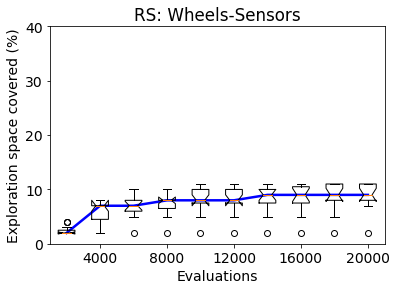

In [11]:
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

plt.figure(0)

# Plot medians and stuff
xValues = rangeValues
xValues = [x/interval +1 for x in xValues]
plt.plot(xValues, medians, '-', color='blue', linewidth=2.5)

#Plot box plot
plt.boxplot(repArray[:,rangeValues],notch=True)

# Labels and stuff
plt.xlabel('Evaluations')
plt.ylabel('Exploration space covered (%)')
axes = plt.gca()
axes.set_ylim([0,40])
rangeX = range(100*40,evaluations+50*40,100*40) # Why are these offsets necessary?
posX = range(int(lenRange/10)*2,lenRange+2,int(lenRange/10)*2) # Why are these offsets necessary?
plt.xticks(posX,rangeX)
plt.title(experimentName + ': ' + xVariable+'-'+yVariable)
plt.savefig(repository+experimentName+xVariable+yVariable+'ExpCovPop.png',dpi=200)